### Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

#### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
#### Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

#### Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### Шаг 4. Маркетинг
Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

#### Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [42]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [43]:
# загружаем данные из файлов и смотрим их
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except Exception as e1:
    try:
        visits = pd.read_csv('visits_info_short.csv')
        orders = pd.read_csv('orders_info_short.csv')
        costs = pd.read_csv('costs_info_short.csv')
    except Exception as e2:
        print('Error:', e1, e2)        
display(visits.head(5))
display(orders.head(5))
display(costs.head(5))

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [44]:
display(visits.info())
display(orders.info())
display(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Пропусков в данных нет, но нужно привести ряд столбцов к формату даты и проверить на дубликаты. Так же можно исправить названия столбцов в соответствии с форматом snake_case.

In [45]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = map(str.lower, costs.columns)

In [46]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [47]:
# проверим столбцы visits на неявные дубликаты
print(visits['region'].unique())
print(visits['device'].unique())
print(visits['channel'].unique())

['United States' 'UK' 'France' 'Germany']
['iPhone' 'Mac' 'Android' 'PC']
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


In [48]:
# проверяем на явные дубликаты
print('Дубликаты в таблице visits:', visits.duplicated().sum())
print('Дубликаты в таблице orders:', orders.duplicated().sum())
print('Дубликаты в таблице costs:', costs.duplicated().sum())

Дубликаты в таблице visits: 0
Дубликаты в таблице orders: 0
Дубликаты в таблице costs: 0


# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

**Построение таблиц для анализа показателей**

In [49]:
# фукция для получения профилей пользователей с признаком наличия оплаты и стоимости привлечения
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            # проверяем, встречается ли каждый пользователь
            # среди тех, кто совершил событие event
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

In [50]:
# функция для расчета удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [51]:
# функция для расчета конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [52]:
# функция для расчета LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

**Визуализация**

In [53]:
# функция для сглаживания динамики скользящим средним
def filter_data(df, window):   
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [54]:
# функция для визуализации удержания, horizon — день жизни, по которому хотим изучить динамику
def plot_retention(retention, retention_history, horizon, window=1): 
    
    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')
    plt.tight_layout()
    plt.show()

In [55]:
# построение графиков конверсии - кривые и динамика
def plot_conversion(conversion, conversion_history, horizon, window=1):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [56]:
# построение кривых и динамики LTV, динамики CAC, кривых и динамики ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [57]:
# воспользуемся функцией для создания профилей пользователей
profiles = get_profiles(visits, orders, [], costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [58]:
# выясним минимальную и максимальную даты привлечения новых пользователей
print('Минимальная дата привлечения нового пользователя:', profiles['dt'].min())
print('Максимальная дата привлечения нового пользователя:', profiles['dt'].max())

Минимальная дата привлечения нового пользователя: 2019-05-01
Максимальная дата привлечения нового пользователя: 2019-10-27


Мы видим, что с первого по последний день исследуемого периода в анализ попадали новые пользователи.

In [59]:
# посмотрим на страны, из которых приходят пользователи
(profiles
     .pivot_table(index='region', values='payer', aggfunc=['count', 'sum', 'mean'])
     .droplevel(1, axis=1)
     .sort_values(by='mean', ascending=False)
     .rename(columns={'count': 'Всего пользователей', 
                      'sum': 'Платящих пользователей', 
                      'mean': '% платящих пользователей'})
     .style.format({'% платящих пользователей': '{:.2%}'})
)

,Всего пользователей,Платящих пользователей,% платящих пользователей
region,,,
United States,100002,6902,6.90%
Germany,14981,616,4.11%
UK,17575,700,3.98%
France,17450,663,3.80%


Подавляющее большинство пользователей приходят к нам из США  - 100 000 человек, это примерно 2/3 от общего числа, также среди них наибольший процент совершают покупку - 6.9%. На покупателей тем самым на США приходится 6902, это около 78%. Так же к нам приходят пользователи из Великобритании, Франции и Германии, на эти страны приходится от 15000 до 18000 посетителей и от 600 до 700 покупателей. Процент совершающих покупку для Европы составляет около 4%.

In [60]:
# посмотрим на устройства, с которых пользователи заходят
(profiles
     .pivot_table(index='device', values='payer', aggfunc=['count', 'sum', 'mean'])
     .droplevel(1, axis=1)
     .sort_values(by='sum', ascending=False)
     .rename(columns={'count': 'Всего пользователей', 
                      'sum': 'Платящих пользователей', 
                      'mean': '% платящих пользователей'})
     .style.format({'% платящих пользователей': '{:.2%}'})
)

,Всего пользователей,Платящих пользователей,% платящих пользователей
device,,,
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
Mac,30042,1912,6.36%
PC,30455,1537,5.05%


Свыше трети платящих пользователей заходят с IPhone - это 3382, с Andriod - 2050 и почти столько же с Mac - 1912. С PC заходят реже остальных - 1537. Процент пользователей, которые совершают покупку колеблется от 5% для PC до 6.4% для Mac.

In [61]:
# изучим рекламные каналы, которые приносят нам покупателей
(profiles
     .pivot_table(index='channel', values='payer', aggfunc=['count', 'sum', 'mean'])
     .droplevel(1, axis=1)
     .sort_values(by='count', ascending=False)
     .rename(columns={'count': 'Всего пользователей', 
                      'sum': 'Платящих пользователей', 
                      'mean': '% платящих пользователей'})
     .style.format({'% платящих пользователей': '{:.2%}'})
)

,Всего пользователей,Платящих пользователей,% платящих пользователей
channel,,,
organic,56439,1160,2.06%
FaceBoom,29144,3557,12.20%
TipTop,19561,1878,9.60%
OppleCreativeMedia,8605,233,2.71%
LeapBob,8553,262,3.06%
WahooNetBanner,8553,453,5.30%
RocketSuperAds,4448,352,7.91%
MediaTornado,4364,156,3.57%
YRabbit,4312,165,3.83%


Больше всего пользователей к нам приходят без дополнительного привлечения, но и процент переходящих в покупку для них наиболее низок - 2%, по покупателям этот канал только на 3 месте. Лидером по количеству привлеченных покупателей для нас является FaceBoom - свыше 3050, он же лидер по проценту посетителей, переходящих в покупатели - 12.2%. На втором месте TipTop c 1900. Остальные каналы не привлекали более 500 покупателей за рассматриваемый период.

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [62]:
# посчитает затраты на рекламу из разных источников
display(costs.groupby('channel')['costs'].sum().sort_values(ascending=False))
print('Всего потрачено на рекламу:', int(costs['costs'].sum()))

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

Всего потрачено на рекламу: 105497


Всего за рассматриваемый период на рекламу было потрачено 105 497 долларов. При этом больше половины - 54 751 ушло на TipTop, на втором месте FaceBoom с 32 446. Любопытно, что привлеченных покупателей с FaceBoom мы получили значительно больше, чем с TipTop и если их качество не окажется существенно выше, то канал привлечения с TipTop будет гораздо менее эффективным.

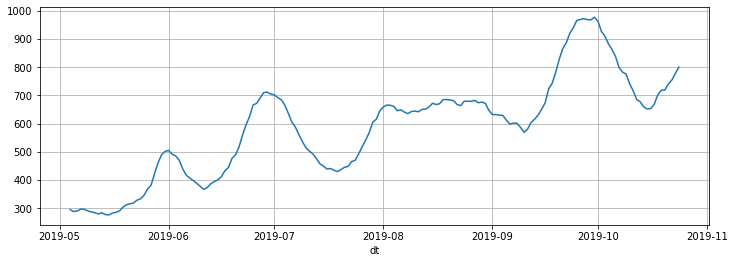

In [63]:
# посмотрим как менялись расходы на рекламу с течением времени. 
# для удобства чтения выведем скользящее среднее за неделю
costs.groupby('dt')['costs'].sum().rolling(7, center=True).mean().plot(grid=True, figsize=(12, 4));

Расходы на рекламу имеет стойкий тренд к увеличению, если в мае они начинались с 300 долларов в день, то на своем пике конце сентября достигали почти 1000 долларов. При этом наблюдаются ярко выраженные пики вокруг первых чисел месяцев и падения в середине. Исключение составляет август - после роста по отношению к середине июля падения не последовало.

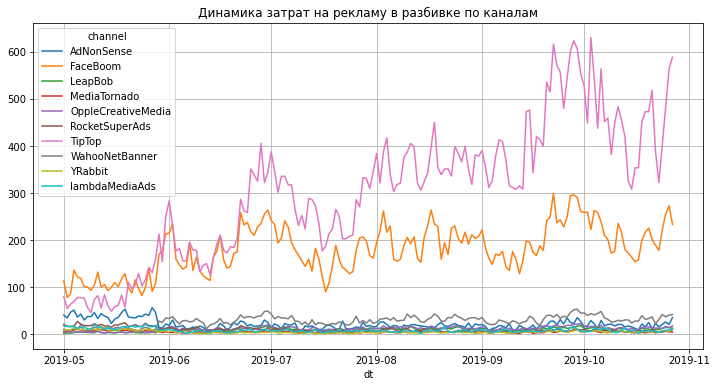

In [64]:
# проверим, какие каналы вносят вклад в динамику роста
(costs
     .pivot_table(index='dt', columns='channel', values='costs', aggfunc='sum')
     .plot(grid=True, figsize=(12, 6)));
plt.title('Динамика затрат на рекламу в разбивке по каналам')
plt.show()

Мы видим, что основной причиной общего роста трат является TipTop, затраты на который возросли в несколько раз за рассматриваемый период. FaceBoom так же показывает небольшую положительную динамику. 

In [65]:
profiles.query('payer == True')\
    .groupby('channel')['acquisition_cost'].mean()\
    .sort_values(ascending=False)

channel
TipTop                2.785961
FaceBoom              1.113243
AdNonSense            1.011119
lambdaMediaAds        0.735322
WahooNetBanner        0.600576
RocketSuperAds        0.418493
OppleCreativeMedia    0.250456
MediaTornado          0.217389
YRabbit               0.211338
LeapBob               0.210378
organic               0.000000
Name: acquisition_cost, dtype: float64

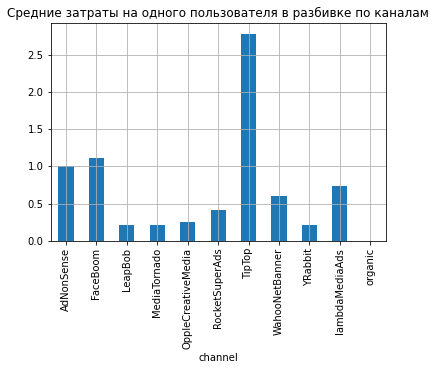

channel
TipTop                2.79
FaceBoom              1.11
AdNonSense            1.01
lambdaMediaAds        0.74
WahooNetBanner        0.60
RocketSuperAds        0.42
OppleCreativeMedia    0.25
MediaTornado          0.22
YRabbit               0.21
LeapBob               0.21
organic               0.00
Name: acquisition_cost, dtype: object

In [66]:
# взглянем на среднюю стоимость привлечения одного покупателя по разным каналам
plt.title('Средние затраты на одного пользователя в разбивке по каналам')
profiles.query('payer == True')\
    .groupby('channel')['acquisition_cost'].mean()\
    .plot(kind='bar', grid=True);
plt.show()

profiles.query('payer == True')\
    .groupby('channel')['acquisition_cost'].mean()\
    .sort_values(ascending=False)\
    .map('{:,.2f}'.format)

Расчеты подтверждают ранее высказанное наблюдение - стоимость одного покупателя из TipTop с большим отрывом выше, чем все остальные, и составляет около 2.8 долларов. FaceBoom на втором месте с 1.1 долларами, AdNoneSense на третьем - 1 доллар. Траты на остальные каналы колеблятся от 0.2 до 0.7. Следует отметить, что эти величины не учитывают траты на пользователей, которые не совершали покупок, однако они будут учтены в расчете ROI далее.

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

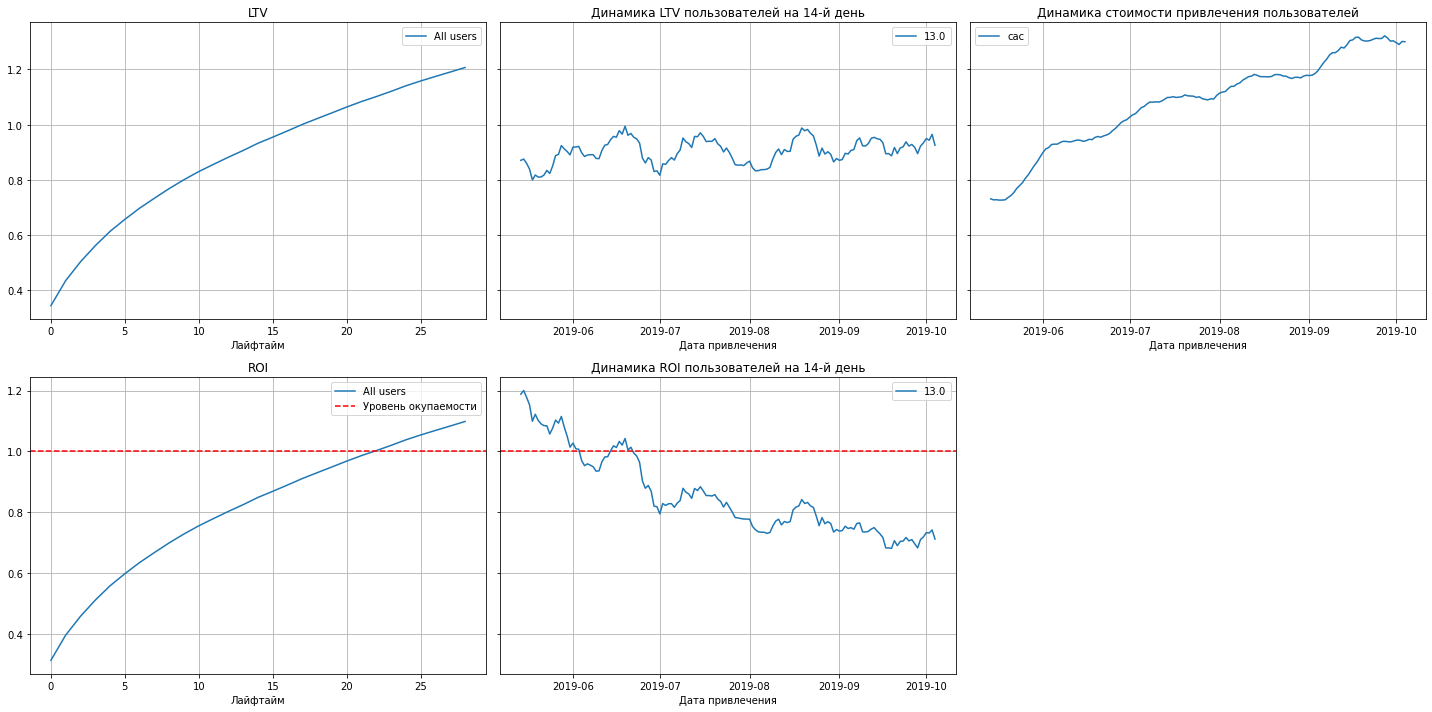

In [67]:
# для дальнейшего анализа нам не понядобятся пользователи с органическим трафиком
profiles = profiles.query('channel != "organic"')

# с помощью функций получим данные о LTV и ROI и выведем их в виде графиков

observation_date = datetime(2019, 11, 1).date() # за дату наблюдения возьмем 01 ноября 2019 года
horizon_days = 29     # в качестве горизонта зададим 4 недели

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=[])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, 14) 

На графике ROI можно видеть, что средняя окупаемость всех рекламных компаний за весь период составила 22 дня. При этом в течение периода стоимость привлечения 1 пользователя росла - если в начале июня она составляла 0.9 доллара, то к концу периода уже около 1.3 доллара. Если рассматривать LTV спустя 2 недели, то, начиная с середины июня он колеблется между 0.8 и 1.0 долларами, не показывая тенденции к росту. В связи с этим ROI с течением времени падает и, если до середины июня рекламные вложения в среднем окупались за срок, меньший, чем 14 дней, то после на это требуется уже больше времени.

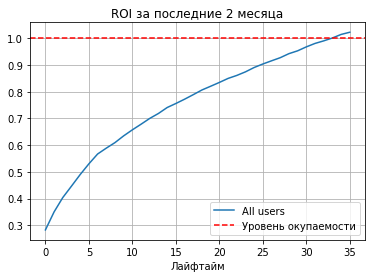

In [68]:
# посмотрим на показатели за последние 2 месяца
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('dt >= datetime(2019, 9, 1).date()'), 
    orders.query('event_dt >= datetime(2019, 9, 1).date()'), 
    observation_date, horizon_days+7, dimensions=[])

roi = roi.drop(columns=['cohort_size', 'cac'])
roi.T.plot(grid=True)
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.xlabel('Лайфтайм')
plt.title('ROI за последние 2 месяца')
plt.show()

На графике за последние 2 месяца (ввиду выбранного горизонта в анализ попали по сути только данные за сентябрь) видно, что окупаемость рекламных компаний составляет уже 33 дня, демонстрируя тенденцию к ухудшению.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

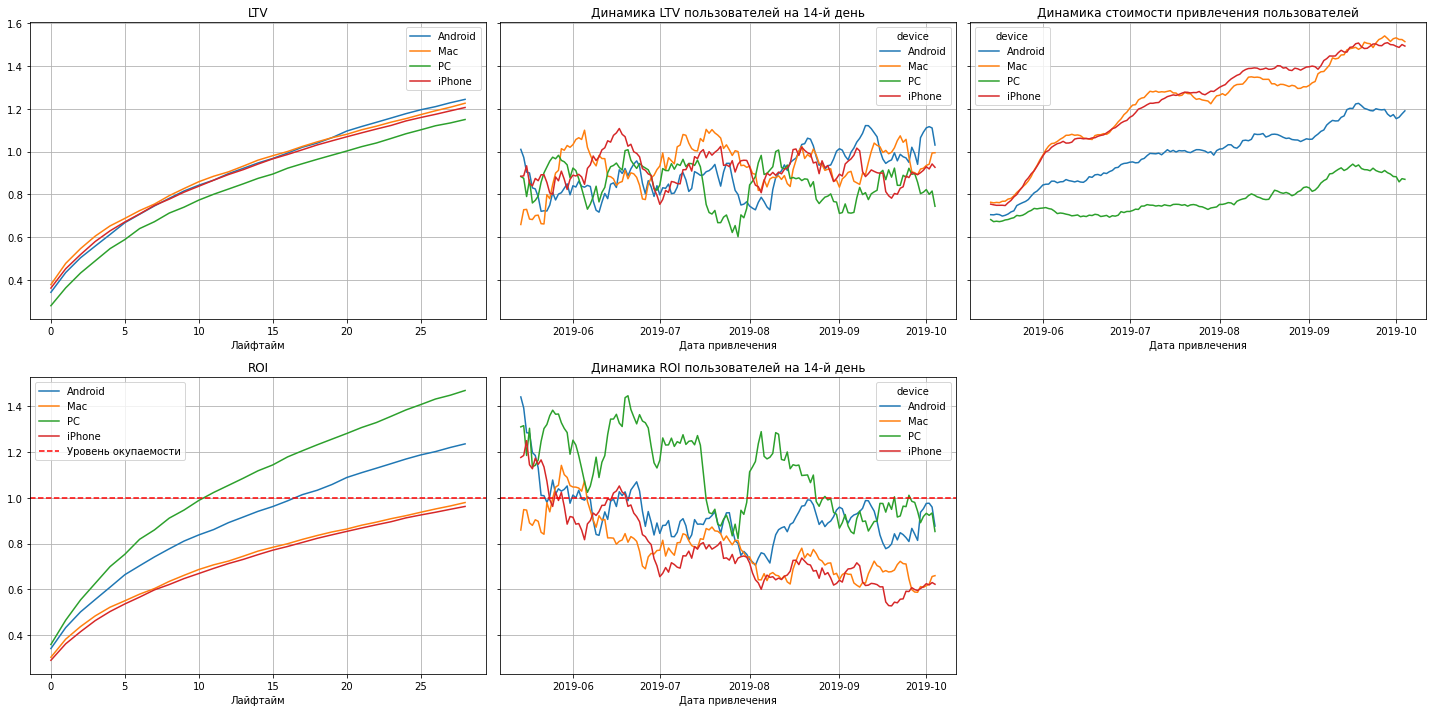

In [69]:
# рассмотрим LTV и ROI в разрезе различных устройств
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, 14) 

За весь период анализа LTV у различных устройств растет примерно одинаково, средний пользователь PC приносит чуть меньше денег, чем пользователи трех остальных платформ. У последних на 14 день этот показатель составляет примерно 0.9 долларов, у первых трех - немного меньше 1. Данные LTV колеблятся в зависимости от даты привлечения, но не демонстрируют тенденций к росту или падению. 

При этом стоимость привлечения пользователей сильнее всего вырос среди использующих IPhone и Mac, к концу периода она достигла 1.5 доллара, тогда как пользователь Android стал обходиться в 1.2, а PC - в 0.9 долларов. 

В связи с практически одинаковым LTV, показатели ROI лучше всего у пользователей PC - они окупаются за 10 дней, пользователи Andriod за 15 дней, а пользователи IPhone и Mac не достигали требуемого срока окупаемости даже в среднем за весь период, для них он составляет около 30 дней.

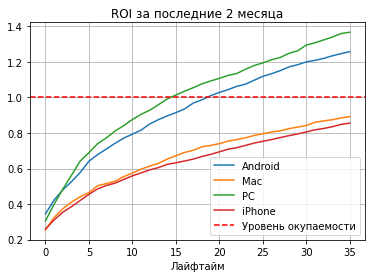

In [70]:
# посмотрим на показатели за последние 2 месяца
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('dt >= datetime(2019, 9, 1).date()'), 
    orders.query('event_dt >= datetime(2019, 9, 1).date()'), 
    observation_date, horizon_days+7, dimensions=['device'])

roi = roi.drop(columns=['cohort_size', 'cac'])
roi.T.plot(grid=True)
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.xlabel('Лайфтайм')
plt.title('ROI за последние 2 месяца')
plt.show()

Показатели за последние 2 месяца ухудшились у пользователей всех платформ, для PC и Andriod  окупаемость составляет 16 и 18 дней. Пользователи Mac и IPhone - уже сильно больше 30.

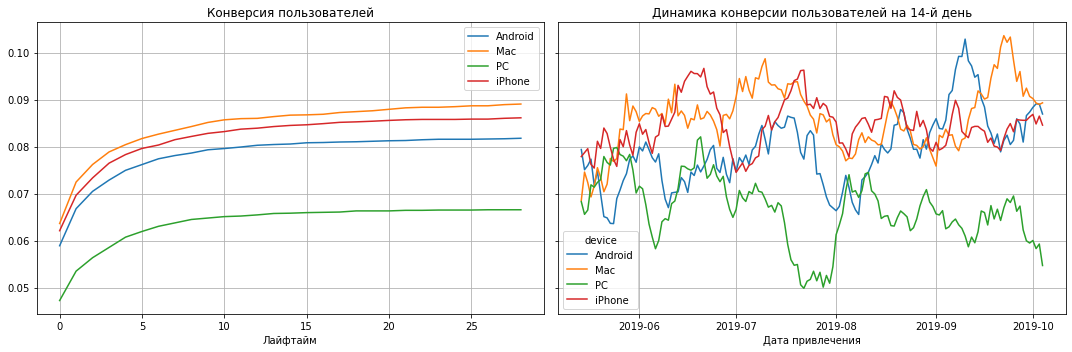

In [71]:
# Посчитаем конверсию по устройствам.
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device'])
plot_conversion(conversion, conversion_history, 14, 14) 

Мы можем наблюдать, что конверсия пользователей PC ниже, чем других устройств. Через 2 недели для PC она составляет примерно 6.5%, для Android - 8%, а для IPhone и Mac около 8.5%. При этом пользователи Mac, в отличии от остальных утсройств в дальнейшем так же увеличивают конверсию (до 9% через месяц). Конверсия через 2 недели в течение рассматриваемого периода немного увеличилась для Mac, а для PC немного упала.

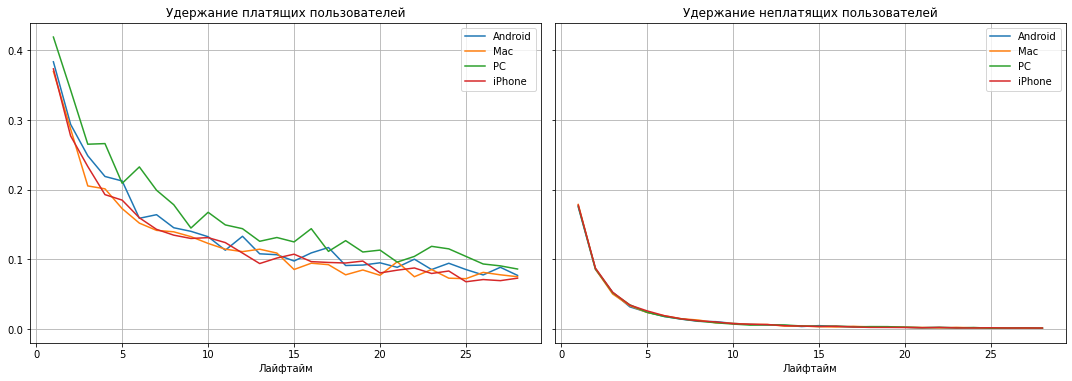

In [72]:
# Посчитаем удержание по устройствам.
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device'])
plot_retention(retention, retention_history, 14, 14)

Удержания платящих пользователей для различных устройств ведут себя примерно одинаково, на 14 день она составляет около 10% (12% для PC)

### Проанализируйте окупаемость рекламы с разбивкой по странам

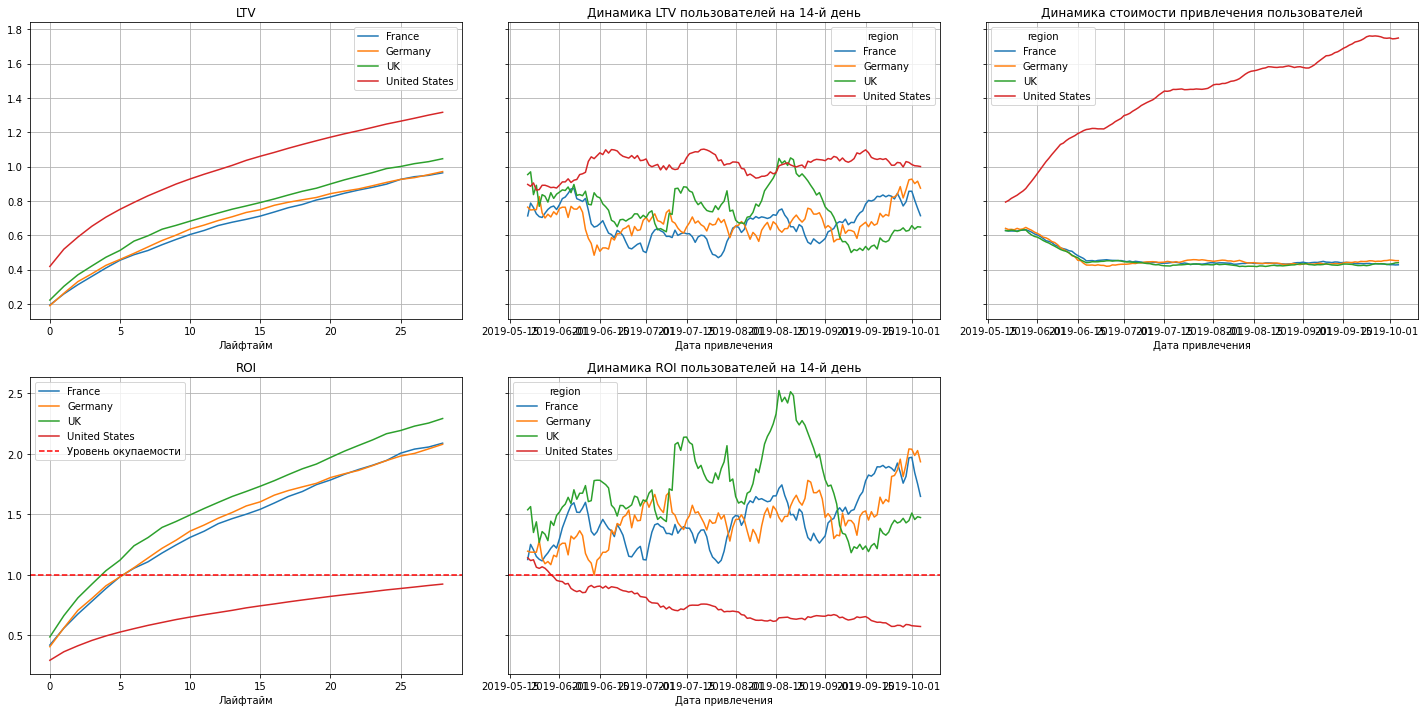

In [73]:
# рассмотрим LTV и ROI в разрезе стран
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, 21) 

На графиках мы можем видеть, что средний пользователь США приносит несколько больший доход, чем пользователи других регионов. Через 2 недели он принесет почти 1 доллар, тогда как пользователи из Европы - от 0.7 до 0.8.

При этом стоимость привлечения нового пользователя из США стремительно выросла в июне и продолжила расти до конца исследуемого периода до почти 1.8 долларов. При этом среди пользователей из остальных стран не наблюдается тенденции к росту - их стоимость составляет стабильно около 0.4 доллара после небольшого падения в июне.

Вследствие такой невысокой стоимости клиенты из стран Европы окупаются в среднем за 5 дней, что является прекрасным показателем. При этом ROI через 2 недели с течением времени для них находится в границах от 1.5 до 2 и не демонстрирует тенденции к снижению. Пользователь из США окупается в среднем за срок свыше 30 дней и этот срок имеет тенденцию к увеличению чем более поздних пользователей мы будем рассматривать. 

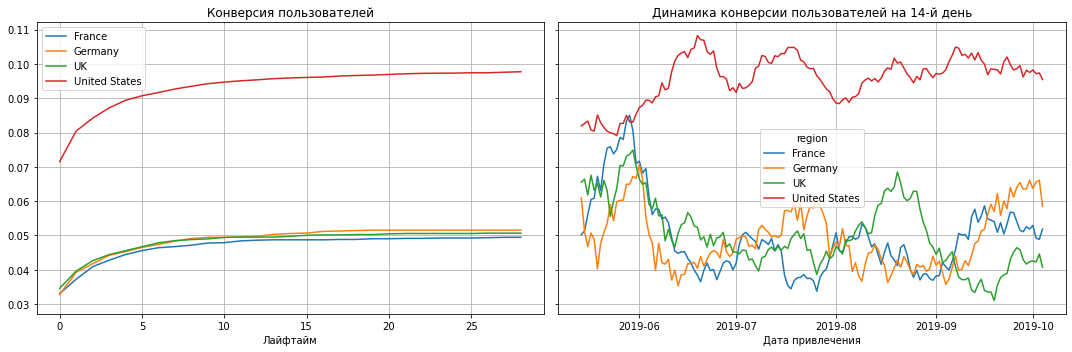

In [74]:
# Посчитаем конверсию по устройствам.
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_conversion(conversion, conversion_history, 14, 14)

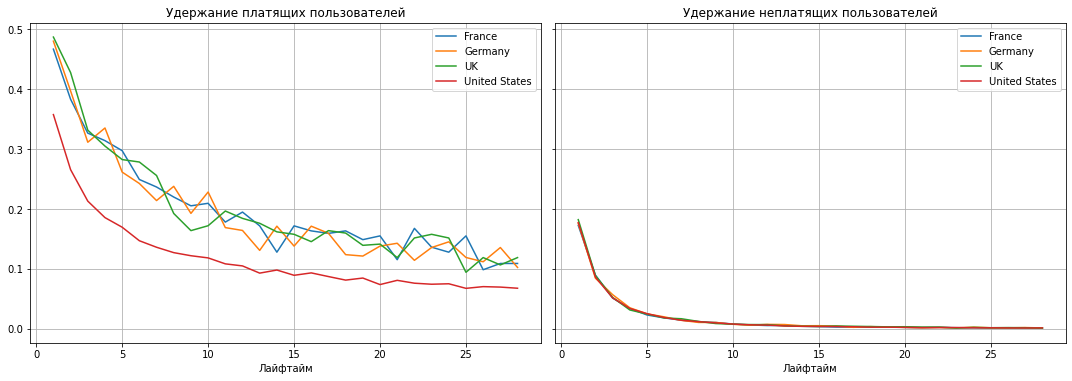

In [75]:
# Посчитаем удержание по устройствам.
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region'])
plot_retention(retention, retention_history, 14, 14)

Изучив кривые конверсии и удержания, можно сделать вывод, что пользователи Европы в среднем ведут себя одинаково - стартовая конверсия у них 3.5%, а через 2 недели она составляет около 5% при удержании 15%. Пользователи из США отличаются от коллег из Старого Света - у них существенно выше и стартовая конверсия - 7%, и через 2 недели - 9.5%, но удержание ниже - всего 10%.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

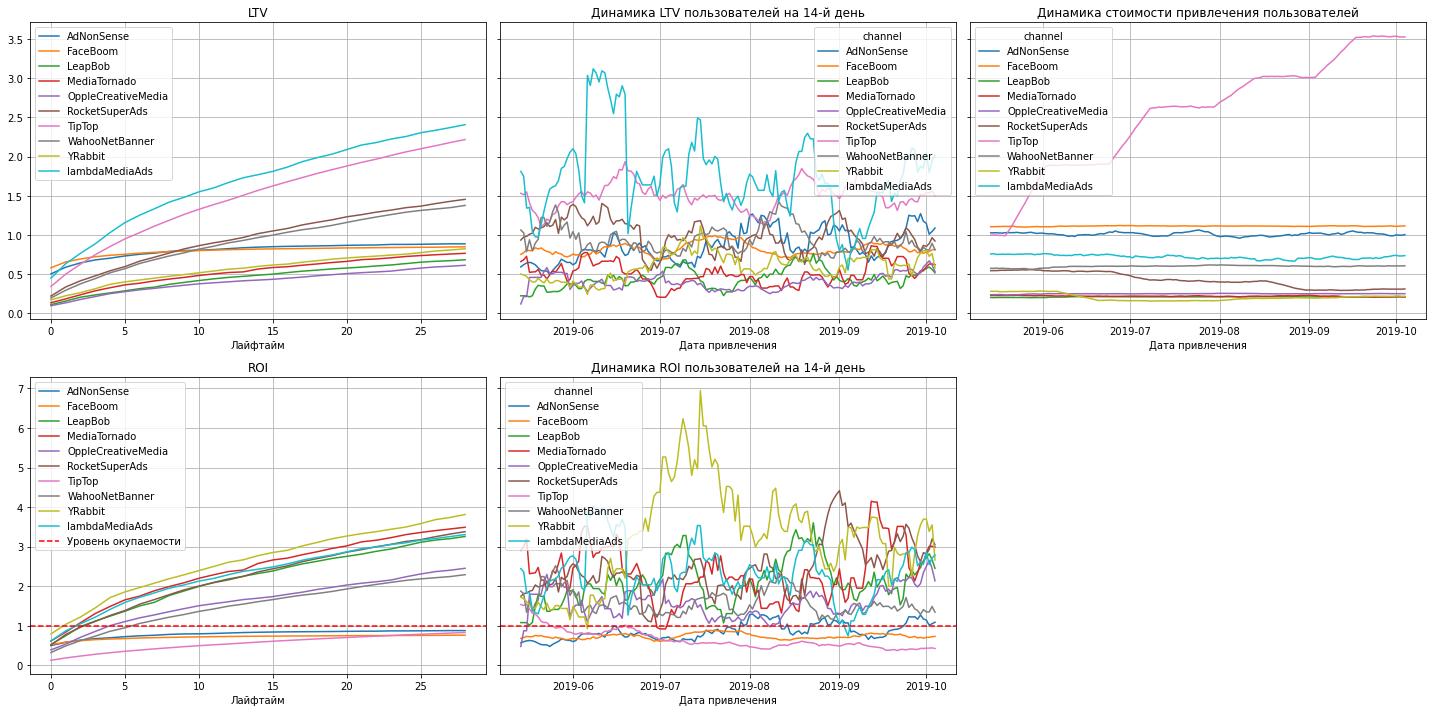

In [76]:
# рассмотрим LTV и ROI в разрезе различных устройств
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, 14) 

Наиболее доходными с точки зрения LTV для нас являются пользователи, пришедшие по каналам TipTop и lambdaMedia на 14 день доход от них составляет 1.6 и 1.8 долларов и продолжает расти с течением жизни. На третьем и четвертом местах - RocketSuper и Wahoo, они приносят около 1 доллара через 14 дней. А вот пользователи первого по количествам покупателей канала - FaceBoom, а так же довольно крупного AdNoneSense практически не приносят дополнительного дохода спустя 10 дней жизни, останавлявась на уровне 0.8 долларов.

На графике изменения стоимости привлечения одного пользователя мы можем видеть, что все каналы, кроме TipTop не меняются с течением времени, а RocketSuper и вовсе подешевел в 2 раза. При этом стоимость привлечения по каналу TipTop выросла с 1 до 3.5 долларов за рассматриваемый период. Стоимости FaceBoom и AdNoneSense стабильно находятся на уровне около 1 доллара.

В связи с отсуствием роста после 10 дня жизни у FaceBoom и AdNoneSense с одной стороны, а также очень серьезным ростом стоимости привлечения у TipTop с другой - эти три канала не выходят на окупаемость за четыре недели. При этом, так как динамика LTV у TipTop по датам не показывает роста, к концу периода его ROI упадет еще больше. FaceBoom, TipTop и AdNoneSense - занимают 1, 2 и 4 места по количеству покупателей среди платных каналов, поэтому такие результаты заставляют обратить на себя внимание в первую очередь.

Среди прочих каналов, включая №3 по количеству покупателей - Wahoo, показывают отличные результаты и их клиенты окупаются в среднем не позже, чем через 5 дней.

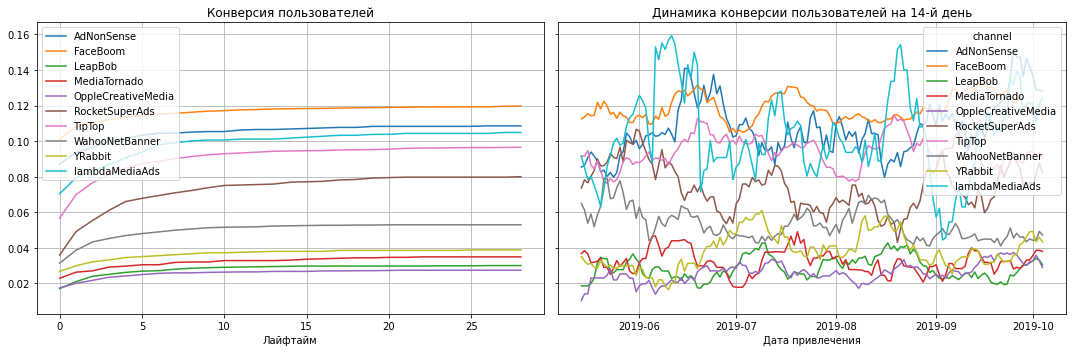

In [77]:
# выясним в чем причина низкой ROI по FaceBoom и AdNoneSense. Посчитаем конверсию.
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel'])
plot_conversion(conversion, conversion_history, 14, 14) 

Конверсия по каналам FaceBoom и AdNoneSense выше всех остальных, с ней все в порядке.

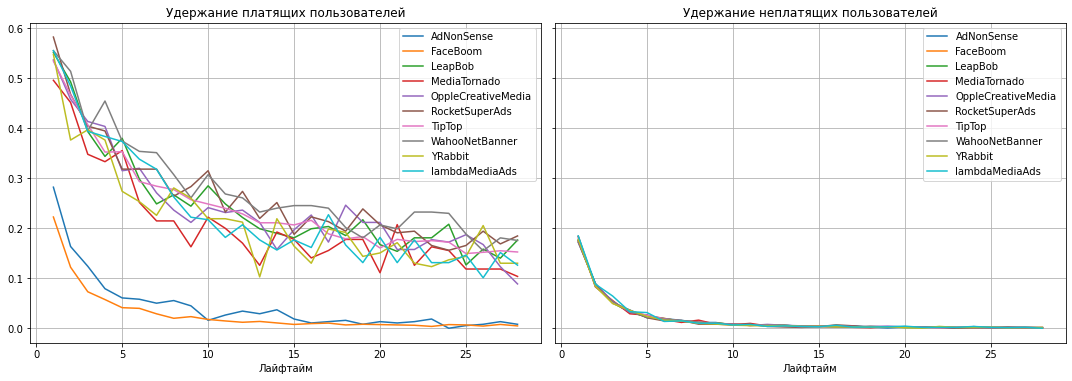

In [78]:
# Посчитаем удержание по FaceBoom и AdNoneSense
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel'])
plot_retention(retention, retention_history, 14, 14)

Динамика удержания платящих пользтвателей по каналам FaceBoom и AdNoneSense в разы ниже как на начальном этапе жизни, так и в последующие. К 10 дню она составляет всего около 2%, тогда как для остальных каналов этот показатель 20-30%.

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

- Если рассматривать средние значения за весь период анализа, то показатель окупаемости всех рекламных компаний составил 22 дня, что не укладывается в норму. А к концу рассматриваего периода эта величина ухудшилась до 33 дней. При этом доход с одного пользователя (LTV) начиная с середины июля не показывает тенденции к росту, а вот стоимость привлечения неуклонно растет.
- Основным источником покупателей для нас являются США, на них приходится около 78% покупателей. При этом, несмотря на то, что их LTV несколько выше, чем у Европейского пользователя (1.0 против 0.8), стоимость привлечения пользователя из США очень сильно выросла и концу периода составила почти 1.8 доллара, тогда как у европейцев этот показатель стабилен на уровне 0.4. В связи с этим пользователи Европы окупаются в среднем за 5 дней, тогда как пользователи из США - более чем за 20 дней и этот срок имеет тенденцию к ухудшению.
- У пользователей Европы через 2 недели конверсия составляет около 5% при удержании 15%, тогда как у пользователя из США 9.5% и 10%. 
- Несмотря на то, что средний пользователь PC приносит немного меньше денег, чем пользователи IPhone, Mac и Android, показатель окупаемости у него лучше вследствие более низкой стоиомсти привлечения. На конец исследуемого периода у PC он составляет 16 дней, у Androd - 18 дней, у IPhone и Mac - сильно больше 30 дней. Это связано в первую очередь с более высокой стоиомстью привлечения одного клиента.
- Конверсия пользователей PC ниже, чем других устройств. Через 2 недели для PC она составляет примерно 6.5%, для Android - 8%, а для IPhone и Mac около 8.5%.
- Самыми главными платными каналами привлечения для нас являются FaceBoom, TipTop, Wahoo и AdNoneSense. При этом Wahoo показывает стабильно хорошие результаты, срок окупаемости пользователя по нему соствляет 5 дней. TipTop - хоть и имеет один самых больших LTV (1.6 доллара на 14 день), но вследствие очень сильного подорожания стоимсти привлечения его пользователи от него не окупаются. У FaceBoom и AdNoneSense стоимость привлечения относительно высока (1 доллар), но стабильна во времени. Однако вследствие очень низкого удержания пользователей (2% через 10 дней против 20-30% у остальных), доход от них не может превысить расходы на привлечение, вследствие чего они также убыточны на данный момент. Пользователи из прочих каналов окупаются менее, чем за 5 дней.

На основании вышеперечисленного можно сделать следующие рекомендации:

- Обсудить с каналом TipTop причину столь резкого увеличения стоимости привлечения клиента и попробовать договориться о скидке, аргументировав это тем, что их стоимость в 3.5 доллара много выше аналогичной у конкурентов, при этом LTV от их пользователей не сильно превышает LTV от остальных. В случае снижения стоимости до 2 долларов, окупаемость составит около 21 дня, выше этой стоимости от рекламы в TipTop лучше отказаться.
- Проанализировать с чем связано такое низкое удержание пользователей, пришедших по каналам FaceBoom и AdNoneSense. Возможно, реклама на этих площадках не соответствует тому, что пользователи ищут на нашем сайте, или же некорректно настроено таргетирование. 
- Начать закупать больше рекламы в Европейских странах, поскольку там средний пользователь стоит существенно дешевле, принося при этом схожий доход. Возможно, рассмотреть вопрос о расширении списка подключенных в Европе стран.
- Ввиду хороших результатов всех каналов, кроме трех вышеперечисленных (FaceBoom, TipTop и AdNoneSense), начать приобретать там больше пользователей.
- Провести ряд компаний, акцентированных на пользователей персональных компьютеров.
- Учитывая более низкое удержание пользователей из США по сравнению с Европой, рассмотреть вариант с дополнительными подписками, скидками на повторные покупки через определенный момент вермени для этого региона.
- Проанализировать качество рекламы в Европейском регионе - конверсия там в два раза ниже, чем в США. Вероятно, стоит сильнее учитывать специфику региона при проведении компаний.